## Вариант 7

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet

In [3]:
data= pd.read_csv('D:\python\data\kc_house_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Датасет содержит следующие поля:
id: Уникальный идентификатор для каждой записи/дома.

date: Дата продажи дома.

price: Цена продажи дома.

bedrooms: Количество спален в доме.

bathrooms: Количество ванных комнат в доме.

sqft_living: Площадь жилой площади в квадратных футах.

sqft_lot: Площадь участка в квадратных футах.

floors: Количество этажей в доме.

waterfront: Бинарный признак, указывающий, находится ли дом у воды (1 - да, 0 - нет).

view: Оценка видов из дома.

condition: Общая оценка состояния дома.

grade: Оценка, присвоенная дому, основываясь на общем качестве и отделке.

sqft_above: Площадь дома над уровнем земли в квадратных футах.

sqft_basement: Площадь подвала дома в квадратных футах.

yr_built: Год постройки дома.

yr_renovated: Год последнего ремонта дома.

zipcode: Почтовый индекс, в котором находится дом.

lat: Широта, на которой находится дом.

long: Долгота, на которой находится дом.

sqft_living15: Средняя площадь жилой площади ближайших 15 домов.

sqft_lot15: Средняя площадь участка ближайших 15 домов.

In [5]:
data['price'] = data['price'].astype(int)
data['floors'] = data['floors'].astype(int)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
print(data.iloc[21000]) # я применял эту команду чтобы рассмотреть столбец дата

id                    7853360720
date             20140908T000000
price                     485000
bedrooms                       3
bathrooms                    2.5
sqft_living                 2430
sqft_lot                    5867
floors                         2
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  2430
sqft_basement                  0
yr_built                    2011
yr_renovated                   0
zipcode                    98065
lat                      47.5162
long                    -121.872
sqft_living15               2620
sqft_lot15                  5866
Name: 21000, dtype: object


Обратите внимание: перед решением любой задачи ML данные должны быть предобработаны! Не должно быть пропущенных значений. Все признаки должны быть числовыми. -  вот это было в самом задании, а тк при проверки значений в столбце data в нем всегда оказывается концовка T00... то можно убрать букву T и нули и заменить тип  столбца на int

In [7]:
check_date_column = data['date'].str.endswith('T000000').all() # все ли значения оканчиваются на T000000
print(f'Столбец "date": {check_date_column}')

Столбец "date": True


In [8]:
data['date'] = data['date'].apply(lambda x: int(x.split('T')[0]))

In [9]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512,1225000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115,291850,3,1.50,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415,229500,3,1.00,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312,323000,3,2.50,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [10]:
data.info() #слолбец data теперь int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  int32  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  int32  
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
data.duplicated().sum()

0

In [12]:
data.isna().sum() #подсчета количества пропущенных значений в каждом столбце

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
data.describe().T # статистического описания данных(.T - транспонирование)

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
date,21613.0,2.014390e+07,4.436582e+03,2.014050e+07,2.014072e+07,2.014102e+07,2.015022e+07,2.015053e+07
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.446213e+00,5.518935e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


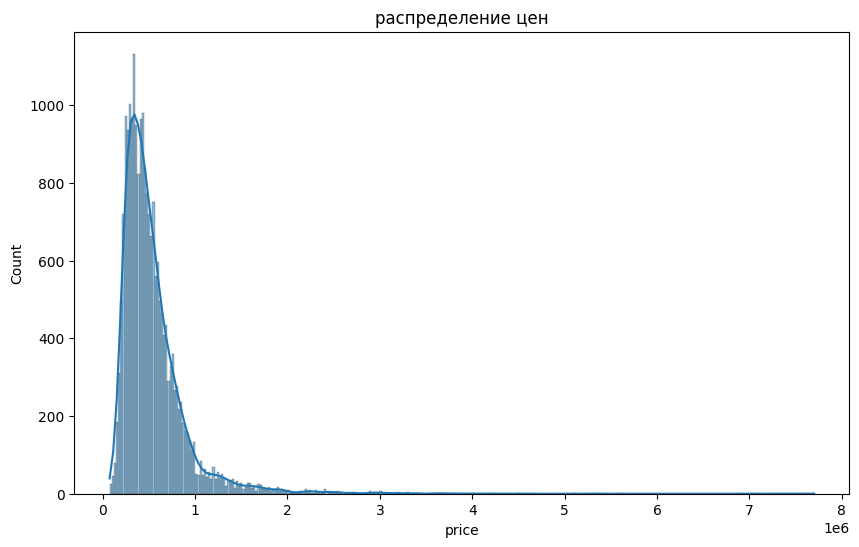

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True) #KDE - это метод оценки формы распределения данных.
plt.title('распределение цен')
plt.show()

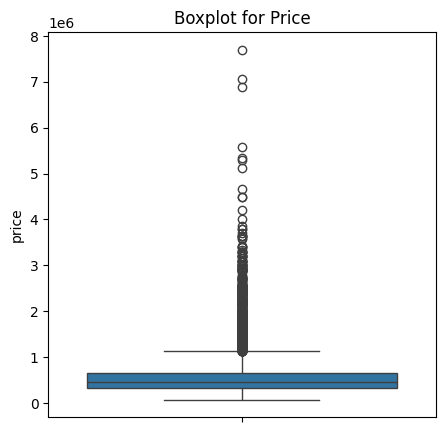

In [15]:
plt.figure(figsize=(5, 5))
sns.boxplot(y=data['price'])
plt.title('Boxplot for Price')
plt.show()

скорее всего в данном случае, возможно, выбросы имеют особое значение или содержат информацию о важных аспектах данных, так что оставлю без изменений

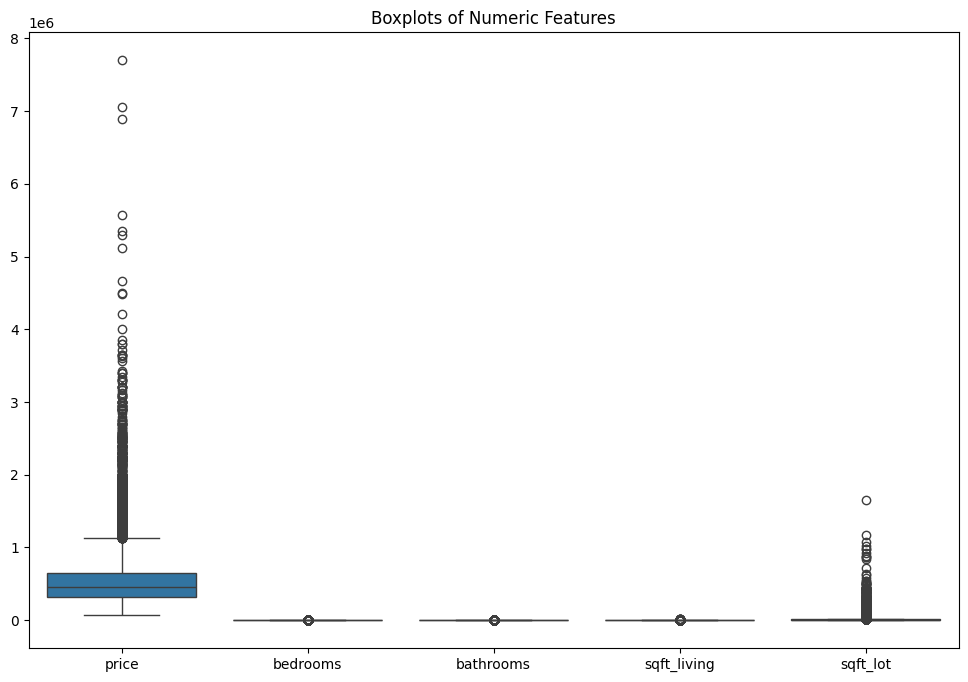

In [16]:
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_features])
plt.title('Boxplots of Numeric Features')
plt.show()

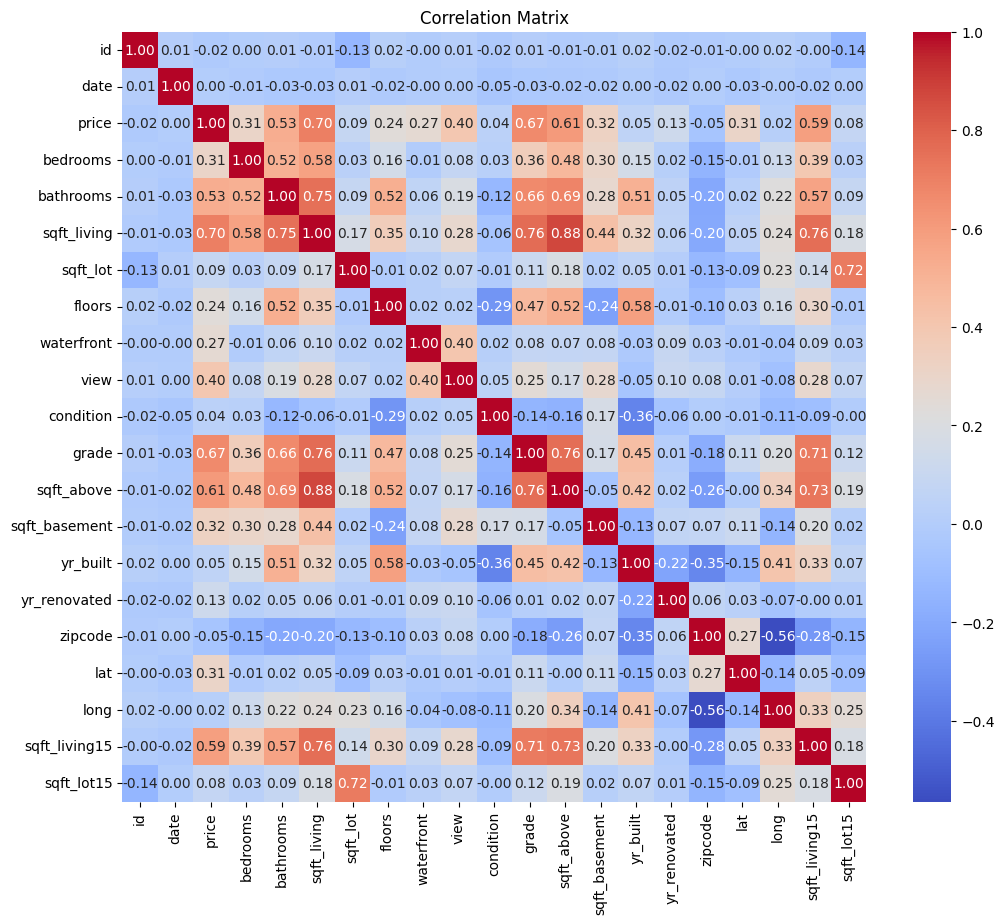

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

по идеи по матрице корреляции можно увидеть что большинство значений либо очень близки к 0 или близки к 1 так что вроде данные нелинейны

In [18]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,5631500400,20150225,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2487200875,20141209,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,1954400510,20150218,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,1321400060,20140627,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
5,2008000270,20150115,291850,3,1.50,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
6,2414600126,20150415,229500,3,1.00,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
7,3793500160,20150312,323000,3,2.50,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
8,9212900260,20140527,468000,2,1.00,1160,6000,1,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
9,6054650070,20141007,400000,3,1.75,1370,9680,1,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [19]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14934 entries, 0 to 14933
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14934 non-null  int64  
 1   date           14934 non-null  int64  
 2   price          14934 non-null  int32  
 3   bedrooms       14934 non-null  int64  
 4   bathrooms      14934 non-null  float64
 5   sqft_living    14934 non-null  int64  
 6   sqft_lot       14934 non-null  int64  
 7   floors         14934 non-null  int32  
 8   waterfront     14934 non-null  int64  
 9   view           14934 non-null  int64  
 10  condition      14934 non-null  int64  
 11  grade          14934 non-null  int64  
 12  sqft_above     14934 non-null  int64  
 13  sqft_basement  14934 non-null  int64  
 14  yr_built       14934 non-null  int64  
 15  yr_renovated   14934 non-null  int64  
 16  zipcode        14934 non-null  int64  
 17  lat            14934 non-null  float64
 18  long  

было удалено порядко 6679 строк

## выделение целевого признака и предикторов и разделение данных на обучающую и тестовую выборки

In [20]:
y = data_filtered["price"]
X = data_filtered[['sqft_living']]

In [21]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=15)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10453, 1), (10453,), (4481, 1), (4481,))

## Обучение простой регрессии 

In [24]:
lr = LinearRegression().fit(X_train, y_train)

In [25]:
lr.predict(X_test)

array([434062.52534545, 375836.09151129, 311480.55937879, ...,
       408013.85757754, 357448.79661629, 470837.11513545])

In [26]:
y_pred = lr.predict(X_test)

In [27]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 124144.6505423959
MSE: 23640696936.868877
RMSE: 153755.31514997742
MAPE: 0.33052886506705614
R^2: 0.2521493073836457


In [28]:
# можем посмотреть какие получились коэффициенты в модели (значения весов)
lr.coef_

array([557747.9451483])

Видим, что модель справилась не очень хорошо, но это было ожидаемо т.к. это простая линейная регрессия. Теперь попробуем применить регуляризации.

In [29]:
# L1
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 4, 7, 10, 100]}
grid_search_lasso = GridSearchCV(Lasso(), param_grid, cv=5).fit(X_train, y_train)
print("Наилучшее значение alpha:", grid_search_lasso.best_params_['alpha'])

best_lasso_model = grid_search_lasso.best_estimator_
print("Коэффициенты:", best_lasso_model.coef_)

y_pred = best_lasso_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {best_lasso_model.score(X_test, y_test)}')

Наилучшее значение alpha: 0.001
Коэффициенты: [557747.91007964]
MAE: 124144.6505466867
MSE: 23640696881.030502
RMSE: 153755.31496839548
MAPE: 0.33052886621890554
R^2: 0.25214930915003886


In [30]:
# L2
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5).fit(X_train, y_train)
print("Наилучшее значение alpha:", grid_search_ridge.best_params_['alpha'])

best_ridge_model = grid_search_ridge.best_estimator_
print("Коэффициенты:", best_ridge_model.coef_)

y_pred = best_ridge_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {best_ridge_model.score(X_test, y_test)}')

Наилучшее значение alpha: 0.001
Коэффициенты: [557746.07397157]
MAE: 124144.65077134279
MSE: 23640693957.570038
RMSE: 153755.30546153535
MAPE: 0.330528926526878
R^2: 0.25214940163089683


In [31]:
#ElasticNet
grid_search_ElasticNet = GridSearchCV(ElasticNet(), param_grid, cv=5).fit(X_train, y_train)
print("Наилучшее значение alpha:", grid_search_ElasticNet.best_params_['alpha'])

best_ElasticNet_model = grid_search_ElasticNet.best_estimator_
print("Коэффициенты:", best_ElasticNet_model.coef_)

y_pred = best_ElasticNet_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: { best_ElasticNet_model.score(X_test, y_test)}')

Наилучшее значение alpha: 0.001
Коэффициенты: [548136.71612197]
MAE: 124153.22306372829
MSE: 23628026177.724476
RMSE: 153714.10533104785
MAPE: 0.3308633191345252
R^2: 0.2525501346531387


Вывод: простая линейная регрессия, lasso и ridge показали себя не очень для данного примера

## Множественная регрессия

In [32]:
x = data_filtered.drop(['price'], axis = 1)

In [33]:
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10453, 20), (10453,), (4481, 20), (4481,))

In [34]:
# LinearRegression
linearR = LinearRegression().fit(X_train, y_train)
linearR.predict(X_test)
y_pred = linearR.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {linearR.score(X_test, y_test)}')
linearR.coef_

MAE: 78454.08089712118
MSE: 10809054800.07359
RMSE: 103966.60425383523
MAPE: 0.19612135996034388
R^2: 0.6580659554855831


array([ 2.03733742e+03,  2.24089311e+04, -2.34106120e+04,  4.64028877e+04,
        1.63273676e+17, -5.06221203e+04,  1.92295203e+04,  8.31298206e+13,
        2.88788509e+15,  8.58311624e+04,  2.32680797e+05, -1.46228622e+17,
       -6.27975678e+16, -2.20435101e+05,  4.46292472e+14, -4.87709412e+04,
        3.21354534e+05, -4.05482680e+03,  1.39497378e+05, -9.64529322e+04])

по метрике R2 видно что относительно простой линейной регресси, множественная справилась лучше (простая 0.25 , множественная 0.65)

In [35]:
#Lasso

# я посмотрел что для решения предупреждения нужно либо
# Lasso(max_iter=15000) увеличить число итераций ( компу тяжело и не работает )
# масштабирование ( итак сделано )
# изменение alpha ( итак меняется )
# Lasso(tol=1e-2) вот это изменение точности модели ( сработало )
# Алгоритм прекращает итерации, когда изменение коэффициентов становится меньше этого значения.
# так и не понял почему если поставить max_iter=1 все равно будет предупреждение ну ладно
grid_search_lasso_mul = GridSearchCV (Lasso(tol=1e-2), param_grid, cv=5).fit(X_train, y_train)
print("Наилучшее значение alpha:", grid_search_lasso_mul.best_params_['alpha'])

best_lasso_mul_model = grid_search_lasso_mul.best_estimator_
print("Коэффициенты:", best_lasso_mul_model.coef_)

y_pred_lasso_mul =  best_lasso_mul_model.predict(X_test)
print(f'MAE (Lasso): {mean_absolute_error(y_test, y_pred_lasso_mul)}')
print(f'MSE (Lasso): {mean_squared_error(y_test, y_pred_lasso_mul)}')
print(f'RMSE (Lasso): {sqrt(mean_squared_error(y_test, y_pred_lasso_mul))}')
print(f'MAPE (Lasso): {mean_absolute_percentage_error(y_test, y_pred_lasso_mul)}')
print(f'R^2 (Lasso): {best_lasso_mul_model.score(X_test, y_test)}')

Наилучшее значение alpha: 0.01
Коэффициенты: [   2034.14788357   22425.38841267  -23405.28488543   46431.13057197
  530198.49908251  -50632.3554143    19272.53634471       0.
       0.           85788.62818697  232720.99495654 -164918.79549274
  -84763.21639514 -220490.97467975       0.          -48760.82569784
  321328.98985869   -4043.72370016  139497.65416068  -96436.44300566]
MAE (Lasso): 78438.93278099012
MSE (Lasso): 10808157543.148785
RMSE (Lasso): 103962.28904342567
MAPE (Lasso): 0.19602522200383182
R^2 (Lasso): 0.6580943393447587


In [36]:
#Ridge
grid_search_ridge_mul = GridSearchCV (Ridge(), param_grid, cv=5).fit(X_train, y_train)
print("Наилучшее значение alpha:", grid_search_ridge_mul.best_params_['alpha'])

best_ridge_mul_model = grid_search_ridge_mul.best_estimator_
print("Коэффициенты:", best_ridge_mul_model.coef_)


y_pred_ridge_mul = best_ridge_mul_model.predict(X_test)
print(f'MAE (Ridge): {mean_absolute_error(y_test, y_pred_ridge_mul)}')
print(f'MSE (Ridge): {mean_squared_error(y_test, y_pred_ridge_mul)}')
print(f'RMSE (Ridge): {sqrt(mean_squared_error(y_test, y_pred_ridge_mul))}')
print(f'MAPE (Ridge): {mean_absolute_percentage_error(y_test, y_pred_ridge_mul)}')
print(f'R^2 (Ridge): {best_ridge_mul_model.score(X_test, y_test)}')

Наилучшее значение alpha: 1
Коэффициенты: [   2072.82025452   22391.8674065   -23043.472923     46454.25617944
  165358.890028    -50882.54257427   19313.107278         0.
       0.           85733.10694166  232497.45128394  160857.01979649
   55366.05368934 -219798.70463908       0.          -48448.0782869
  320881.85967791   -4004.67667756  139376.97054306  -95709.87176261]
MAE (Ridge): 78433.7740707845
MSE (Ridge): 10808139161.487083
RMSE (Ridge): 103962.20063795823
MAPE (Ridge): 0.1959909512711902
R^2 (Ridge): 0.6580949208309337


In [37]:
#ElasticNet
grid_search_elnet_mul = GridSearchCV (ElasticNet(), param_grid, cv=5).fit(X_train, y_train)
print("Наилучшее значение alpha:", grid_search_elnet_mul.best_params_['alpha'])

best_elnet_mul_model = grid_search_elnet_mul.best_estimator_
print("Коэффициенты:", best_elnet_mul_model.coef_)

y_pred_multiple_elNet  = best_elnet_mul_model .predict(X_test)
print(f'MAE (ElasticNet): {mean_absolute_error(y_test, y_pred_multiple_elNet)}')
print(f'MSE (ElasticNet): {mean_squared_error(y_test, y_pred_multiple_elNet)}')
print(f'RMSE (ElasticNet): {sqrt(mean_squared_error(y_test, y_pred_multiple_elNet))}')
print(f'MAPE (ElasticNet): {mean_absolute_percentage_error(y_test, y_pred_multiple_elNet)}')
print(f'R^2 (ElasticNet): {best_elnet_mul_model.score(X_test, y_test)}')

Наилучшее значение alpha: 0.001
Коэффициенты: [   2232.04616309   22251.08295453  -21554.52901914   46542.19637902
  163365.66717721  -51727.30232062   19474.3138878        0.
       0.           85490.12246143  231551.19939747  158641.05108959
   55342.65142032 -216910.01990281       0.          -47153.30133893
  319005.93992185   -3848.50006548  138835.78595676  -92891.6008651 ]
MAE (ElasticNet): 78416.02205213177
MSE (ElasticNet): 10809334097.65543
RMSE (ElasticNet): 103967.94745331578
MAPE (ElasticNet): 0.1958573596926213
R^2 (ElasticNet): 0.6580571201754151


Ну гораздо лучше себя показала именно множественная регрессия ( но это если сравнивать с простой регрессией) 

## Полиномиальная регрессия

In [40]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [41]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
print(f'MAE (Poly): {mean_absolute_error(y_test, y_pred_poly)}')
print(f'MSE (Poly): {mean_squared_error(y_test, y_pred_poly)}')
print(f'RMSE (Poly): {sqrt(mean_squared_error(y_test, y_pred_poly))}')
print(f'MAPE (Poly): {mean_absolute_percentage_error(y_test, y_pred_poly)}')
print(f'R^2 (Poly): {poly_model.score(X_test_poly, y_test)}')

MAE (Poly): 67154.16808120397
MSE (Poly): 8074501952.204356
RMSE (Poly): 89858.23252326052
MAPE (Poly): 0.16970404456216012
R^2 (Poly): 0.7445709027270364


In [42]:
# l1 
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_lasso_poly = GridSearchCV(Lasso(tol=1.35e-1), param_grid, cv=5).fit(X_train_poly, y_train)
print("Наилучшее значение alpha:", grid_search_lasso_poly.best_params_['alpha'])

best_lasso_poly_model = grid_search_lasso_poly.best_estimator_
print("Коэффициенты:", best_lasso_poly_model.coef_)

y_pred_poly_lasso = best_lasso_poly_model.predict(X_test_poly)
print(f'MAE (lasso): {mean_absolute_error(y_test, y_pred_poly_lasso)}')
print(f'MSE (lasso): {mean_squared_error(y_test, y_pred_poly_lasso)}')
print(f'RMSE (lasso): {sqrt(mean_squared_error(y_test, y_pred_poly_lasso))}')
print(f'MAPE (lasso): {mean_absolute_percentage_error(y_test, y_pred_poly_lasso)}')
print(f'R^2 (lasso): {best_lasso_poly_model.score(X_test_poly, y_test)}')

Наилучшее значение alpha: 0.01
Коэффициенты: [ 0.00000000e+00 -2.05934406e+04  4.92476920e+03 -4.76114018e+03
  3.54537167e+04  3.37754440e+05 -1.45941876e+05 -5.78463977e+04
  0.00000000e+00  0.00000000e+00  3.24914119e+04  1.06910947e+05
 -9.00849303e+04  4.28289412e+04 -1.44660708e+05  0.00000000e+00
  2.14552832e+05  5.67471426e+05  2.24126982e+05  7.40516605e+04
 -2.12088287e+04  2.04731328e+04 -2.96895689e+03 -2.71283826e+03
  6.60737023e+02 -1.57762469e+03  7.62226284e+04 -3.09488753e+03
  0.00000000e+00  0.00000000e+00 -9.51482131e+03 -7.73588717e+04
  5.05025944e+04  1.15432343e+04  5.28534460e+03  0.00000000e+00
  2.27713010e+04  5.54555618e+03  8.37941936e+04 -1.50650709e+04
 -8.24426479e+04  2.83446319e+04  2.68158346e+03  1.99850938e+03
 -1.80318619e+04 -1.48741203e+02 -7.75502285e+02  0.00000000e+00
  0.00000000e+00 -5.33319363e+03 -5.00245504e+03  9.68776670e+03
  6.25168076e+03 -8.57616616e+03  0.00000000e+00  1.91733483e+03
  2.57938798e+04 -3.51552491e+04  3.94185876e

In [43]:
# l2
grid_search_ridge_poly = GridSearchCV(Ridge(), param_grid, cv=5).fit(X_train_poly, y_train)
print("Наилучшее значение alpha:", grid_search_ridge_poly.best_params_['alpha'])

best_ridge_poly_model = grid_search_ridge_poly.best_estimator_
print("Коэффициенты:", best_ridge_poly_model.coef_)

y_pred_poly_ridge = best_ridge_poly_model.predict(X_test_poly)
print(f'MAE (ridge): {mean_absolute_error(y_test, y_pred_poly_ridge)}')
print(f'MSE (ridge): {mean_squared_error(y_test, y_pred_poly_ridge)}')
print(f'RMSE (ridge): {sqrt(mean_squared_error(y_test, y_pred_poly_ridge))}')
print(f'MAPE (ridge): {mean_absolute_percentage_error(y_test, y_pred_poly_ridge)}')
print(f'R^2 (ridge): {best_ridge_poly_model.score(X_test_poly, y_test)}')

Наилучшее значение alpha: 0.1
Коэффициенты: [ 0.00000000e+00 -4.90651465e+04 -1.26053363e+05  8.41456645e+04
 -3.71852126e+02  4.88525189e+04  8.47761913e+04 -1.32760387e+05
  0.00000000e+00  0.00000000e+00 -3.00540145e+02 -6.28943177e+03
  5.59878505e+04 -3.35515995e+03 -1.87309707e+04  0.00000000e+00
 -2.36844998e+05  1.30064893e+06 -1.28696876e+05  1.24398111e+05
 -7.90305873e+04  2.69614147e+04 -1.53461615e+03 -5.26418710e+02
  4.68222046e+04 -2.15186709e+04  5.27162629e+04  1.38582130e+04
  0.00000000e+00  0.00000000e+00  1.31289488e+04 -7.74460824e+04
 -2.37323413e+04 -3.48981505e+03 -8.16708472e+03  0.00000000e+00
  2.71321500e+04  9.42738893e+03  2.76542886e+04  7.05322882e+04
 -3.41023025e+04  1.47926678e+05  1.38884272e+03  2.26967881e+03
 -2.08040346e+02 -1.34420393e+04  5.17642467e+03  0.00000000e+00
  0.00000000e+00 -2.57166011e+03 -4.50051997e+03 -5.97548420e+03
  6.17038756e+03 -1.26572279e+04  0.00000000e+00  7.08400900e+03
  2.72977010e+04 -2.82256677e+04  5.38445202e+

In [45]:
#ElasticNet
param_grid = {'alpha': [0.001, 0.01, 0.1]}
grid_search_elasnet_poly = GridSearchCV(ElasticNet(tol=1.65e-1), param_grid, cv=5).fit(X_train_poly, y_train)
print("Наилучшее значение alpha:", grid_search_elasnet_poly.best_params_['alpha'])

best_elasnet_poly_model = grid_search_elasnet_poly.best_estimator_
print("Коэффициенты:", best_elasnet_poly_model.coef_)

y_pred_poly_elasnet = best_elasnet_poly_model.predict(X_test_poly)
print(f'MAE (ElasticNet): {mean_absolute_error(y_test, y_pred_poly_elasnet)}')
print(f'MSE (ElasticNet): {mean_squared_error(y_test, y_pred_poly_elasnet)}')
print(f'RMSE (ElasticNet): {sqrt(mean_squared_error(y_test, y_pred_poly_elasnet))}')
print(f'MAPE (ElasticNet): {mean_absolute_percentage_error(y_test, y_pred_poly_elasnet)}')
print(f'R^2 (ElasticNet): {best_elasnet_poly_model.score(X_test_poly, y_test)}')

Наилучшее значение alpha: 0.01
Коэффициенты: [ 0.00000000e+00 -1.05485415e+04  3.26440468e+03 -4.83564607e+04
 -2.48563073e+04  2.21692284e+04 -2.22463566e+04  2.56082486e+04
  0.00000000e+00  0.00000000e+00 -1.78503573e+04  6.30784924e+04
  6.82443519e+04  1.00623376e+04 -4.98220998e+04  0.00000000e+00
 -1.70796846e+03  1.66173669e+05 -1.81953684e+04  6.64175228e+04
 -3.49078904e+04  2.21516170e+03 -3.33992685e+03 -1.52179416e+04
 -2.70097913e+03  8.73852811e+03 -6.43751135e+03  2.32605329e+03
  0.00000000e+00  0.00000000e+00 -1.03396218e+04 -2.13837018e+04
  7.39374787e+03  9.36506513e+01 -2.60195831e+04  0.00000000e+00
  4.04709094e+03  5.02491416e+04  2.67535868e+04  2.66442492e+04
 -7.73297899e+03  1.09620855e+04 -2.09546959e+03  3.14945737e+03
  3.27481676e+03 -6.58549614e+03  4.49589032e+03  0.00000000e+00
  0.00000000e+00 -2.57582897e+03 -5.91639005e+03 -1.31850675e+02
  5.05987100e+03 -1.75913796e+04  0.00000000e+00  1.09854717e+04
  3.92434665e+04 -1.68371681e+04  9.68388518e

## Пайплайн для регрессий

In [46]:
# это для простой регрессии
linear_regression_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('linear_regression', LinearRegression())
])

lasso_pipeline = Pipeline([
    ('scaler',  MinMaxScaler()),
    ('lasso', Lasso(alpha=1.0))  
])

ridge_pipeline = Pipeline([
    ('scaler',  MinMaxScaler()),
    ('ridge', Ridge(alpha=1.0))  
])

elasticnet_pipeline = Pipeline([
    ('scaler',  MinMaxScaler()),
    ('elasticnet', ElasticNet(alpha=1.0, l1_ratio=0.5))  
])
# для множественной тоже самое так что пропустим :)
# ...
# пример для 1 полиномиальной 
polynomial_linear_regression_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler',  MinMaxScaler()),
    ('linear_regression', LinearRegression())
])


In [47]:
linear_regression_pipeline.fit(X_train, y_train)
y_pred_lr_pipe = linear_regression_pipeline.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred_lr_pipe)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_lr_pipe)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_lr_pipe))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_lr_pipe)}')
print(f'R^2: {linear_regression_pipeline.score(X_test, y_test)}')

MAE: 78438.93043001319
MSE: 10808155417.175364
RMSE: 103962.27881869156
MAPE: 0.19602522174328404
R^2: 0.6580944065978815


Как я понял пайплайн удобен тем, масштабирование данных, отбор признаков, обучение модели и т.д., он объединяет в одну структурированную структуру кода.
и т.к. пайплайны написаны более знающими людьми, то пайплайн автоматически применяет преобразование к данным в нужной последовательности, что избавляет скорее всего от лишних проблем в работе и от утечек данных

## Реализация метрик

MSE

In [44]:
def mean_squared_error_handmade(y, y_pred):
    squared_errors = (y - y_pred) ** 2 
    return sum(squared_errors) / len(y)

In [45]:
print(f'MSE: {mean_squared_error(y_test, y_pred_lr_pipe)}')
print(f'MSE_myself: {mean_squared_error_handmade(y_test, y_pred_lr_pipe)}')

MSE: 10808155417.175364
MSE_myself: 10808155417.175337


MAE

In [46]:
def mean_absolute_error_handmade(y, y_pred):
    absolute_errors = abs(y - y_pred)
    return sum(absolute_errors) / len(y)

In [47]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_lr_pipe)}')
print(f'MAE_myself: {mean_absolute_error_handmade(y_test, y_pred_lr_pipe)}')

MAE: 78438.93043001319
MAE_myself: 78438.93043001342


RMSE

In [48]:
def root_mean_squared_error_handmade(y, y_pred):
    squared_errors = (y - y_pred) ** 2 
    mean_squared_error = sum(squared_errors) / len(y)
    return math.sqrt(mean_squared_error)

In [49]:
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_lr_pipe))}')
print(f'RMSE_myself: {root_mean_squared_error_handmade(y_test, y_pred_lr_pipe)}')

RMSE: 103962.27881869156
RMSE_myself: 103962.27881869143


MAPE

In [50]:
def mean_absolute_percentage_handmade(y, y_pred):
    absolute_percentage_errors = abs((y - y_pred) / y) * 100 
    return sum(absolute_percentage_errors) / len(y)

In [51]:
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_lr_pipe)}')
print(f'MAPE_myself: {mean_absolute_percentage_handmade(y_test, y_pred_lr_pipe)}')

MAPE: 0.19602522174328404
MAPE_myself: 19.60252217432841


In [52]:
def r_squared_handmade(y, y_pred):
    total_sum_squares = sum((y - np.mean(y))**2)
    residual_sum_squares = sum((y - y_pred)**2)
    return 1 - (residual_sum_squares / total_sum_squares)

In [53]:
print(f'R^2: {linear_regression_pipeline.score(X_test, y_test)}')
print(f'R^2_myself: {r_squared_handmade(y_test, y_pred_lr_pipe)}')

R^2: 0.6580944065978815
R^2_myself: 0.6580944065978821
